# **Case Study: Mcdonalds**

In [1]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv('/content/mcdonalds.csv')

# Display the column names
print("Column names in the mcdonalds dataset:")
print(mcdonalds.columns.tolist())


Column names in the mcdonalds dataset:
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [2]:
# Get the dimensions of the dataset
dimensions = mcdonalds.shape
print("Dimensions of the mcdonalds dataset:")
print(f"Rows: {dimensions[0]}, Columns: {dimensions[1]}")

Dimensions of the mcdonalds dataset:
Rows: 1453, Columns: 15


In [3]:
# Display the first 3 rows of the dataset
print("First 3 rows of the mcdonalds dataset:")
print(mcdonalds.head(3))

First 3 rows of the mcdonalds dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
# Convert columns 1 to 11 to a binary matrix (1 for "Yes", 0 otherwise)
MD_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)

# Calculate and display the column means, rounded to 2 decimal places
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [5]:
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA on the binary matrix MD_x
pca = PCA()
MD_pca = pca.fit(MD_x)

# Display the summary (explained variance ratio for each component)
explained_variance = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_.round(2)
})
print(explained_variance)


   Principal Component  Explained Variance Ratio
0                  PC1                      0.30
1                  PC2                      0.19
2                  PC3                      0.13
3                  PC4                      0.08
4                  PC5                      0.06
5                  PC6                      0.05
6                  PC7                      0.04
7                  PC8                      0.04
8                  PC9                      0.04
9                 PC10                      0.03
10                PC11                      0.03


In [6]:
# Display the explained variance ratios with 1 decimal place
explained_variance_rounded = explained_variance.copy()
explained_variance_rounded['Explained Variance Ratio'] = explained_variance_rounded['Explained Variance Ratio'].round(1)
print(explained_variance_rounded)


   Principal Component  Explained Variance Ratio
0                  PC1                       0.3
1                  PC2                       0.2
2                  PC3                       0.1
3                  PC4                       0.1
4                  PC5                       0.1
5                  PC6                       0.0
6                  PC7                       0.0
7                  PC8                       0.0
8                  PC9                       0.0
9                 PC10                       0.0
10                PC11                       0.0


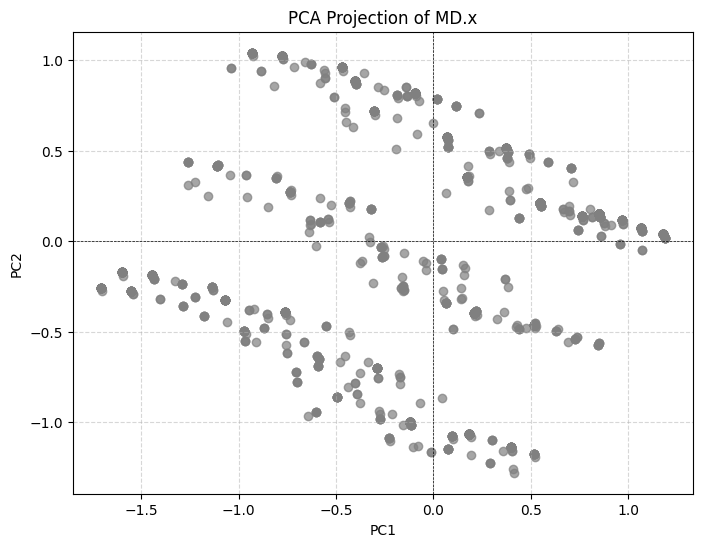

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Project data onto principal components
MD_pca_scores = pca.transform(MD_x)

# Plot the projections onto the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca_scores[:, 0], MD_pca_scores[:, 1], color='grey', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of MD.x")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(1234)

# Define the range of clusters and number of repetitions
cluster_range = range(2, 9)
n_reps = 10
best_models = {}

# Perform k-means clustering for each k in the range 2 to 8
for k in cluster_range:
    best_inertia = np.inf
    best_model = None

    for _ in range(n_reps):
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(0, 10000))
        kmeans.fit(MD_x)

        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_model = kmeans

    best_models[k] = best_model

# Display the best model for each k
for k, model in best_models.items():
    print(f"Best model for k={k} clusters:")
    print(f"Inertia: {model.inertia_}")
    print(f"Cluster Centers:\n{model.cluster_centers_}")
    print()


Best model for k=2 clusters:
Inertia: 2145.5037269171557
Cluster Centers:
[[0.87053571 0.97767857 0.10267857 0.8359375  0.43303571 0.93861607
  0.67075893 0.97098214 0.30022321 0.28125    0.06473214]
 [0.04129264 0.79533214 0.07899461 0.91741472 0.67684022 0.83842011
  0.48294434 0.11849192 0.45062837 0.06642729 0.52962298]]

Best model for k=3 clusters:
Inertia: 1818.7176591653833
Cluster Centers:
[[0.84304207 0.98058252 0.08899676 0.80420712 0.36569579 0.96278317
  0.92880259 0.96440129 0.01779935 0.30420712 0.04045307]
 [0.81360947 0.95857988 0.12721893 0.90532544 0.62130178 0.86390533
  0.10059172 0.93786982 0.9112426  0.20710059 0.15680473]
 [0.01408451 0.78269618 0.07645875 0.9195171  0.66197183 0.84708249
  0.52716298 0.04627767 0.40442656 0.06237425 0.55331992]]

Best model for k=4 clusters:
Inertia: 1639.48484663001
Cluster Centers:
[[0.01967213 0.94098361 0.0852459  0.87868852 0.46557377 0.94754098
  0.8557377  0.38688525 0.02622951 0.09836066 0.13442623]
 [0.79360465 0.96220

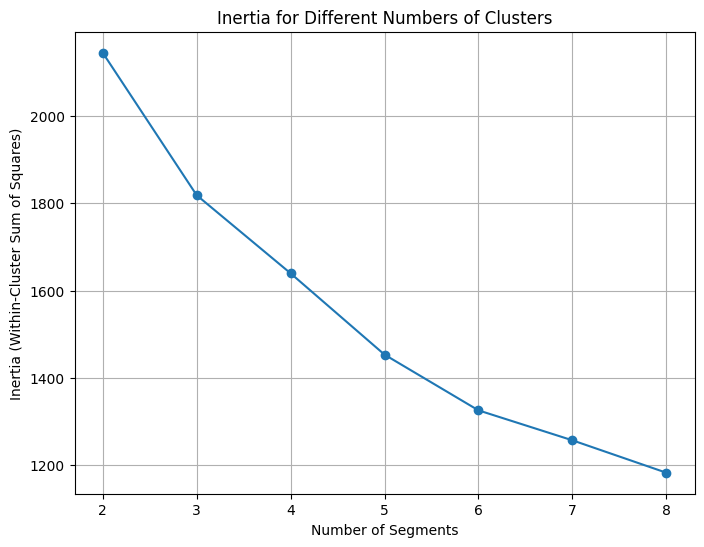

In [9]:
import matplotlib.pyplot as plt

# Gather the number of clusters and corresponding best inertia values
cluster_range = list(best_models.keys())
inertia_values = [model.inertia_ for model in best_models.values()]

# Plot the number of clusters against inertia
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Inertia for Different Numbers of Clusters")
plt.grid(True)
plt.show()


In [10]:
import numpy as np
from sklearn.utils import resample
from sklearn.cluster import KMeans

# Set parameters for clustering
cluster_range = range(2, 9)
n_reps = 10
n_boot = 100
np.random.seed(1234)

# Dictionary to store bootstrapped cluster centers for each k
bootstrapped_centers = {k: [] for k in cluster_range}

# Perform bootstrapping for each number of clusters
for k in cluster_range:
    for _ in range(n_boot):
        # Resample the data (bootstrap sample)
        MD_x_resampled = resample(MD_x, random_state=np.random.randint(0, 10000))

        # Run k-means multiple times on the resampled data
        best_inertia = np.inf
        best_centers = None
        for _ in range(n_reps):
            kmeans = KMeans(n_clusters=k, random_state=np.random.randint(0, 10000))
            kmeans.fit(MD_x_resampled)

            if kmeans.inertia_ < best_inertia:
                best_inertia = kmeans.inertia_
                best_centers = kmeans.cluster_centers_

        # Store the best cluster centers for this bootstrap sample
        bootstrapped_centers[k].append(best_centers)

# Example output for viewing results
for k, centers_list in bootstrapped_centers.items():
    print(f"Number of clusters: {k}, Number of bootstrap samples: {len(centers_list)}")


Number of clusters: 2, Number of bootstrap samples: 100
Number of clusters: 3, Number of bootstrap samples: 100
Number of clusters: 4, Number of bootstrap samples: 100
Number of clusters: 5, Number of bootstrap samples: 100
Number of clusters: 6, Number of bootstrap samples: 100
Number of clusters: 7, Number of bootstrap samples: 100
Number of clusters: 8, Number of bootstrap samples: 100


<ipython-input-13-e8c69773e738>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number of Segments', y='Adjusted Rand Index', data=ari_df, palette="Blues")


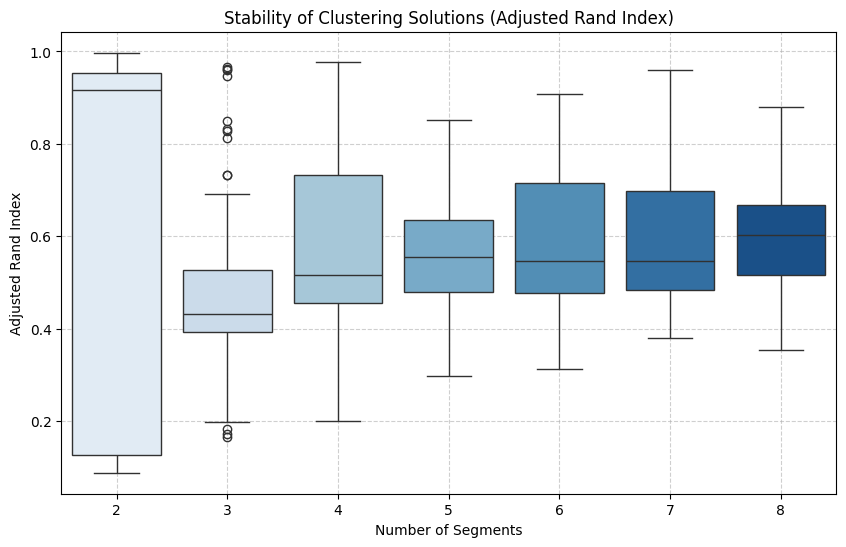

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Parameters
cluster_range = range(2, 9)
n_reps = 10
n_boot = 100
np.random.seed(1234)

# Store ARI scores for each cluster number
ari_scores = {k: [] for k in cluster_range}

# Perform bootstrapping and calculate ARI
for k in cluster_range:
    # Initial clustering on the original data
    original_labels = KMeans(n_clusters=k, random_state=1234).fit(MD_x).labels_

    for _ in range(n_boot):
        # Resample data
        MD_x_resampled = resample(MD_x, random_state=np.random.randint(0, 10000))

        # Run k-means on the bootstrap sample
        kmeans_boot = KMeans(n_clusters=k, random_state=np.random.randint(0, 10000))
        kmeans_boot.fit(MD_x_resampled)

        # Calculate ARI between the original and resampled clustering
        ari = adjusted_rand_score(original_labels, kmeans_boot.predict(MD_x))
        ari_scores[k].append(ari)

# Convert ARI scores to a DataFrame for plotting
ari_df = pd.DataFrame({
    'Number of Segments': np.repeat(list(ari_scores.keys()), n_boot),
    'Adjusted Rand Index': np.concatenate(list(ari_scores.values()))
})

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Segments', y='Adjusted Rand Index', data=ari_df, palette="Blues")
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Stability of Clustering Solutions (Adjusted Rand Index)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


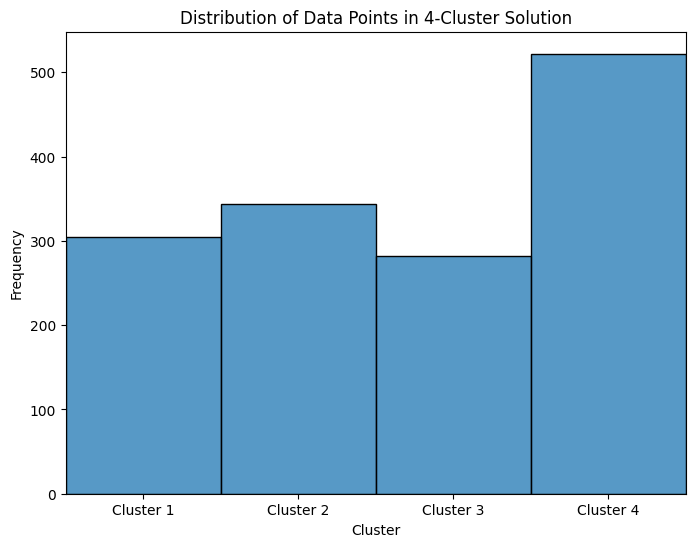

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Use the 4-cluster solution from the stored k-means models
kmeans_4 = best_models[4]
cluster_labels = kmeans_4.predict(MD_x)

# Plot the histogram of cluster assignments
plt.figure(figsize=(8, 6))
sns.histplot(cluster_labels, bins=4, discrete=True, kde=False)
plt.xlim(-0.5, 3.5)  # Set limits to fit 4 clusters (0 to 3)
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Distribution of Data Points in 4-Cluster Solution")
plt.xticks(np.arange(4), labels=[f"Cluster {i+1}" for i in range(4)])
plt.show()


In [16]:
# Retrieve the best model for the 4-cluster solution from the stored models
MD_k4 = best_models[4]

# Display basic information about the 4-cluster model, such as cluster centers
print("Cluster centers for the 4-cluster solution:")
print(MD_k4.cluster_centers_)


Cluster centers for the 4-cluster solution:
[[0.01967213 0.94098361 0.0852459  0.87868852 0.46557377 0.94754098
  0.8557377  0.38688525 0.02622951 0.09836066 0.13442623]
 [0.79360465 0.9622093  0.0872093  0.88081395 0.46511628 0.85174419
  0.00581395 0.8372093  0.84883721 0.16860465 0.06976744]
 [0.0248227  0.66666667 0.08510638 0.95744681 0.88652482 0.79432624
  0.33687943 0.06382979 0.64539007 0.04255319 0.88652482]
 [0.99042146 0.98275862 0.10727969 0.80268199 0.40804598 0.96168582
  0.98084291 0.98084291 0.07279693 0.36206897 0.07279693]]


In [17]:
from sklearn.metrics import silhouette_samples
import pandas as pd

# Predict the cluster labels for MD.x using the 4-cluster model
cluster_labels = MD_k4.predict(MD_x)

# Calculate the silhouette scores for each data point
silhouette_vals = silhouette_samples(MD_x, cluster_labels)

# Store the silhouette scores in a DataFrame for easy handling
MD_r4 = pd.DataFrame({'Cluster': cluster_labels, 'Silhouette Score': silhouette_vals})

# Display the first few silhouette scores for the 4-cluster solution
print(MD_r4.head())


   Cluster  Silhouette Score
0        0          0.169043
1        3          0.065338
2        1          0.141146
3        3          0.209673
4        0          0.204606


<ipython-input-18-ed9f16332b43>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MD_r4, x='Cluster', y='Silhouette Score', palette="Blues")


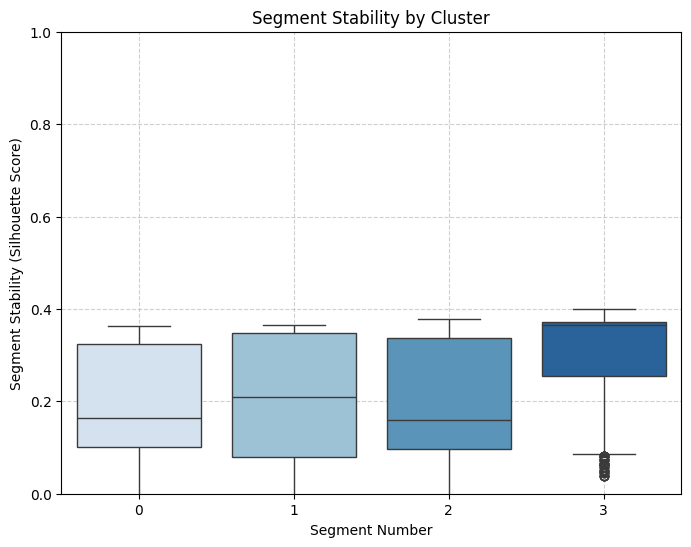

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming MD_r4 contains the 'Cluster' and 'Silhouette Score' columns

plt.figure(figsize=(8, 6))
sns.boxplot(data=MD_r4, x='Cluster', y='Silhouette Score', palette="Blues")
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability (Silhouette Score)")
plt.title("Segment Stability by Cluster")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# Set random seed for reproducibility
np.random.seed(1234)

# Define the range for the number of clusters and repetitions
cluster_range = range(2, 9)
n_reps = 10

# Dictionary to store the best model for each number of clusters
best_models = {}
lowest_bic = {}

# Fit Gaussian Mixture Models for binary data with varying clusters
for k in cluster_range:
    best_bic = np.inf
    best_model = None

    for _ in range(n_reps):
        # Fit a Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, covariance_type="diag", random_state=np.random.randint(0, 10000))
        gmm.fit(MD_x)

        # Track the model with the lowest BIC
        bic = gmm.bic(MD_x)
        if bic < best_bic:
            best_bic = bic
            best_model = gmm

    best_models[k] = best_model
    lowest_bic[k] = best_bic

# Display the best models and their BIC scores for each k
for k, model in best_models.items():
    print(f"Best model for k={k} clusters with BIC={lowest_bic[k]:.2f}")


Best model for k=2 clusters with BIC=-19438.83
Best model for k=3 clusters with BIC=-29639.28
Best model for k=4 clusters with BIC=-35974.57
Best model for k=5 clusters with BIC=-53461.52
Best model for k=6 clusters with BIC=-49377.13
Best model for k=7 clusters with BIC=-60347.88
Best model for k=8 clusters with BIC=-59990.02


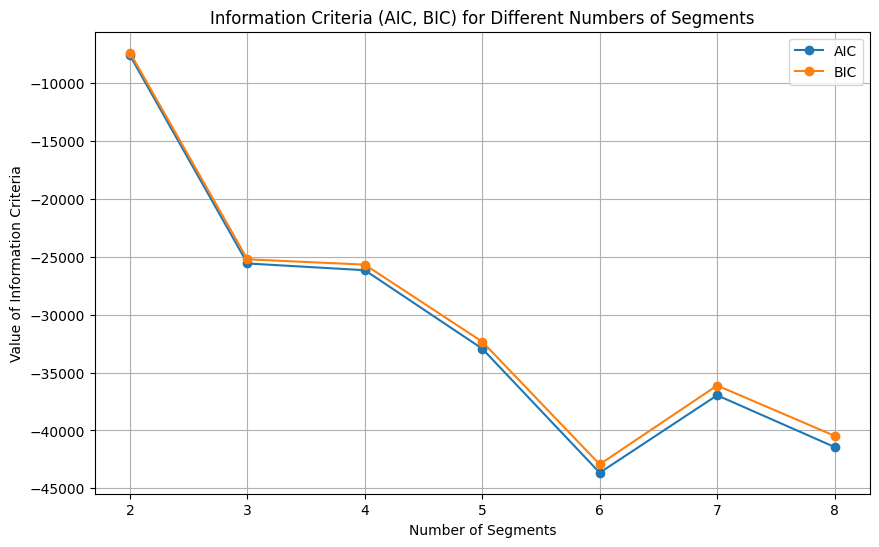

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Set the range for the number of clusters
cluster_range = range(2, 9)
aic_values = []
bic_values = []

# Fit Gaussian Mixture Models for each number of clusters and calculate AIC and BIC
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, covariance_type="diag", random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

# Plot the AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, aic_values, label="AIC", marker='o')
plt.plot(cluster_range, bic_values, label="BIC", marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Value of Information Criteria")
plt.title("Information Criteria (AIC, BIC) for Different Numbers of Segments")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Assuming MD_k4 is the k-means model with 4 clusters
kmeans_clusters = MD_k4.predict(MD_x)

# Retrieve the best Gaussian Mixture model with 4 clusters
MD_m4 = best_models[4]  # Assuming best_models is a dictionary from previous steps
mixture_clusters = MD_m4.predict(MD_x)

# Create a contingency table to compare k-means and mixture model clusters
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

# Display the contingency table
print("Contingency Table between K-means and Mixture Model Clusters:")
print(contingency_table)


Contingency Table between K-means and Mixture Model Clusters:
mixture   0    1    2    3
kmeans                    
0        26   24   85  170
1        30   84  228    2
2        24  171    0   87
3        56    1  425   40


In [22]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming MD_k4 is the k-means model with 4 clusters
kmeans_clusters = MD_k4.predict(MD_x)

# Fit a Gaussian Mixture model using the initial cluster assignments from k-means
MD_m4a = GaussianMixture(n_components=4, covariance_type='diag', random_state=1234)
MD_m4a.fit(MD_x)  # Fitting without re-initialization here

# Predict new cluster assignments with the mixture model
mixture_clusters = MD_m4a.predict(MD_x)

# Create a contingency table to compare k-means and mixture model clusters
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

# Display the contingency table
print("Contingency Table between K-means and Mixture Model Clusters:")
print(contingency_table)


Contingency Table between K-means and Mixture Model Clusters:
mixture    0    1    2    3
kmeans                     
0        111    8  180    6
1         42   69    0  233
2          1  177   97    7
3        467    0    0   55


In [23]:
# Calculate the log-likelihood of the fitted mixture model
log_likelihood = MD_m4a.score(MD_x) * len(MD_x)

# Display the log-likelihood
print(f"Log-likelihood of the mixture model: {log_likelihood:.2f}")


Log-likelihood of the mixture model: 13167.06


In [24]:
# Calculate the log-likelihood of the fitted mixture model MD_m4
log_likelihood_m4 = MD_m4.score(MD_x) * len(MD_x)

# Display the log-likelihood
print(f"Log-likelihood of the mixture model (MD_m4): {log_likelihood_m4:.2f}")


Log-likelihood of the mixture model (MD_m4): 18318.59


In [25]:
# Get the counts of each unique value in the 'Like' column in descending order
like_counts = mcdonalds['Like'].value_counts(ascending=False)

# Display the counts
print(like_counts)

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64


In [26]:
# Create a new column 'Like.n' by applying the transformation
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Display the counts for the new 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()
print(like_n_counts)


Like.n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64


In [27]:
# Create a formula-like string
columns = "+".join(mcdonalds.columns[:11])
formula = f"Like.n ~ {columns}"

# Display the formula
print(formula)

Like.n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting


In [35]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# Load the dataset
mcdonalds = pd.read_csv('/content/mcdonalds.csv')

# Define the independent variables and the dependent variable (like before)
X = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)
y = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Set random seed for reproducibility
np.random.seed(1234)

# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

# Display the cluster sizes
labels = gmm.predict(X)
cluster_sizes = np.bincount(labels)

# Print results similar to the R output
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes, start=1):
    print(f"{i}: {size}")

# Display the number of iterations (convergence)
print(f"\nConvergence after {gmm.n_iter_} iterations")


Cluster sizes:
1: 985
2: 468

Convergence after 7 iterations


In [38]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# Define the independent variables and the dependent variable
X = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)
y = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Set random seed for reproducibility
np.random.seed(1234)

# Fit a Gaussian Mixture Model with 2 components (this would be your MD.reg2)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

# Refit the model (if needed, here we just refit with the same data)
MD_ref2 = GaussianMixture(n_components=2, n_init=10, random_state=1234)
MD_ref2.fit(X)

# Summarize the results
summary = {
    'Cluster Means': MD_ref2.means_,
    'Cluster Covariances': MD_ref2.covariances_,
    'Weights': MD_ref2.weights_,
    'Convergence Iterations': MD_ref2.n_iter_
}

# Print the summary
print("Summary of the Refit Model (MD.ref2):")
print(f"Cluster Means:\n{summary['Cluster Means']}")
print(f"\nCluster Covariances:\n{summary['Cluster Covariances']}")
print(f"\nWeights:\n{summary['Weights']}")
print(f"\nConvergence Iterations: {summary['Convergence Iterations']}")



Summary of the Refit Model (MD.ref2):
Cluster Means:
[[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]

Cluster Covariances:
[[[ 2.16791951e-01  9.49836582e-30 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  9.49836582e-30  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 9.49195883e-30  1.00000000e-06  1.48321868e-30  1.19234123e-29
    6.64405083e-30  1.26217745e-29  9.51308188e-30  1.06876637e-29
    4.41922282e-30  3.76731137e-30  0.00000000e+00]
  [-6.17588704e-03  1.48001518e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.48001518e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.19009879e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.19009879e-29 -7.54670309e-03 -8.1

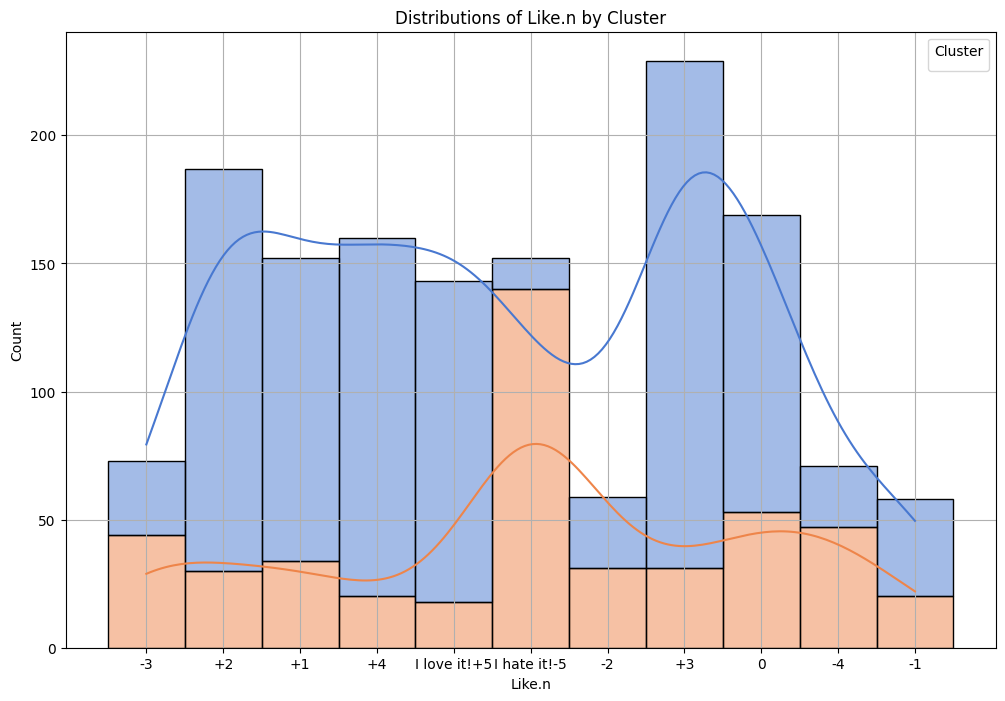

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

# Prepare data
X = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)
y = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Fit the Gaussian Mixture Model
np.random.seed(1234)
MD_ref2 = GaussianMixture(n_components=2, n_init=10, random_state=1234)
MD_ref2.fit(X)

# Predict cluster labels
cluster_labels = MD_ref2.predict(X)

# Add the cluster labels to the original DataFrame for plotting
mcdonalds['Cluster'] = cluster_labels

# Plotting the distributions of the clusters
plt.figure(figsize=(12, 8))
sns.histplot(data=mcdonalds, x='Like', hue='Cluster', multiple='stack', bins=30, palette='muted', kde=True)
plt.title('Distributions of Like.n by Cluster')
plt.xlabel('Like.n')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


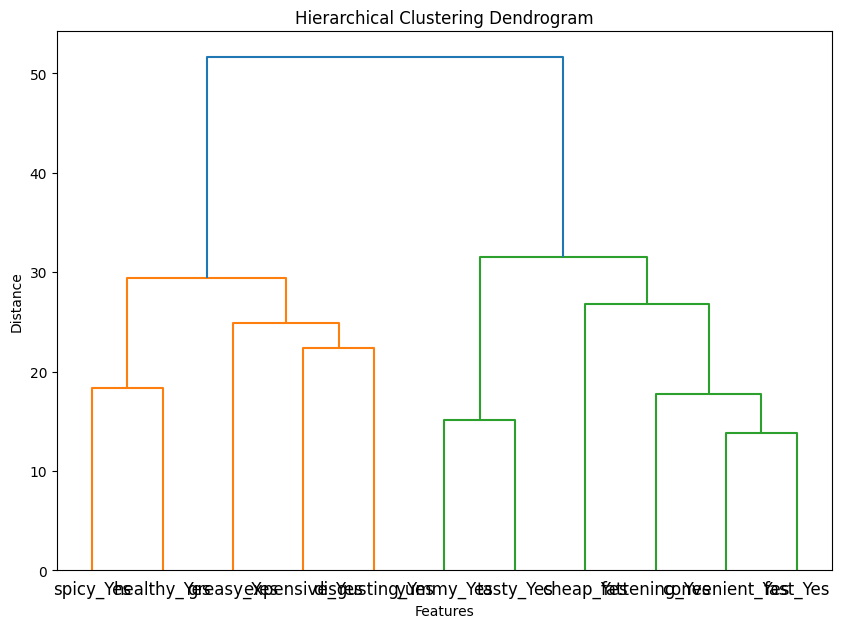

In [52]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Prepare the data
MD_x = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)

# Calculate the distance matrix for the transposed data using pdist
distance_matrix = pdist(MD_x.T, metric='euclidean')

# Perform hierarchical clustering using the Ward method
MD_vclust = linkage(distance_matrix, method='ward')

# Optional: To visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(MD_vclust, labels=MD_x.columns, orientation='top')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()



<ipython-input-54-6da1589a7c86>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues")


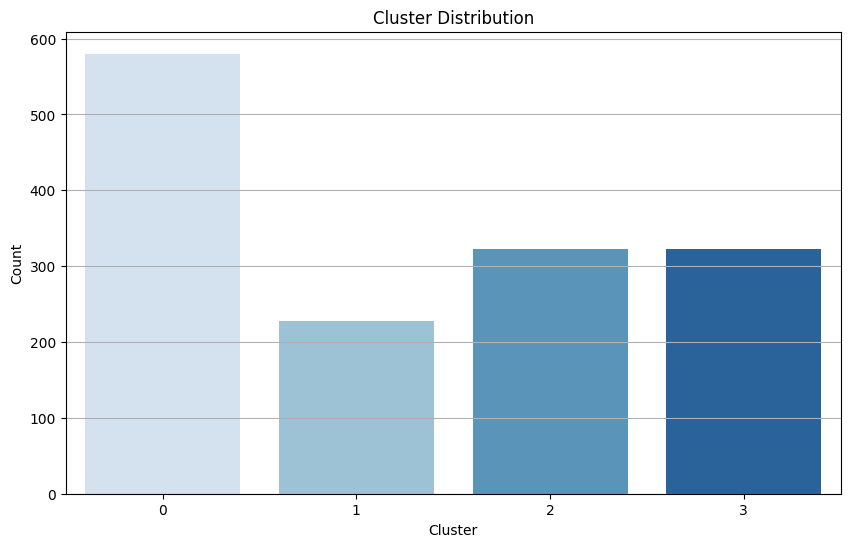

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

# Prepare the data
MD_x = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)

# Fit KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Hierarchical clustering
distance_matrix = pdist(MD_x.T, metric='euclidean')
MD_vclust = linkage(distance_matrix, method='ward')

# Create a DataFrame to hold cluster labels
results_df = pd.DataFrame({
    'Cluster': clusters
})

# Count occurrences of each cluster
counts = results_df['Cluster'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette="Blues")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


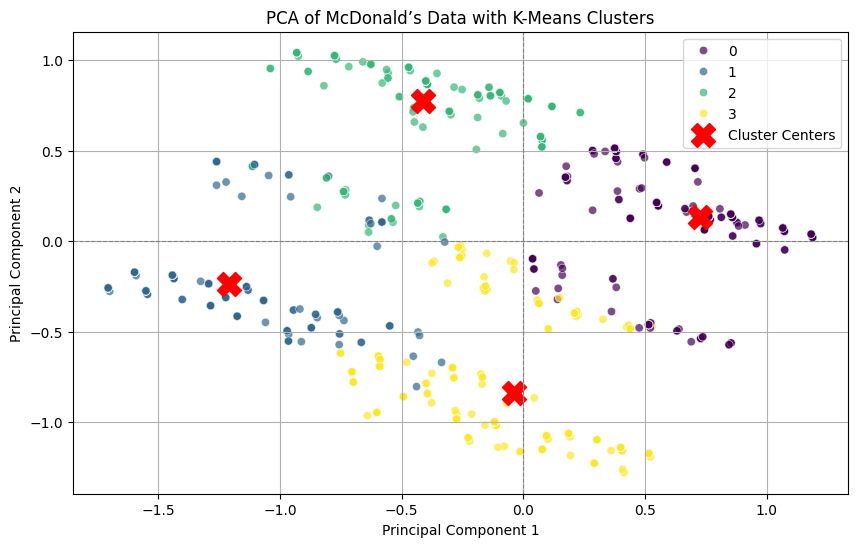

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Prepare the data
MD_x = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)

# Fit KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(MD_x)

# Create a DataFrame for PCA results and clusters
pca_df = pd.DataFrame(data=pca_results, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters

# Plot the PCA results with cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', alpha=0.7)

# Add projections of the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')

# Adding labels and title
plt.title('PCA of McDonald’s Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

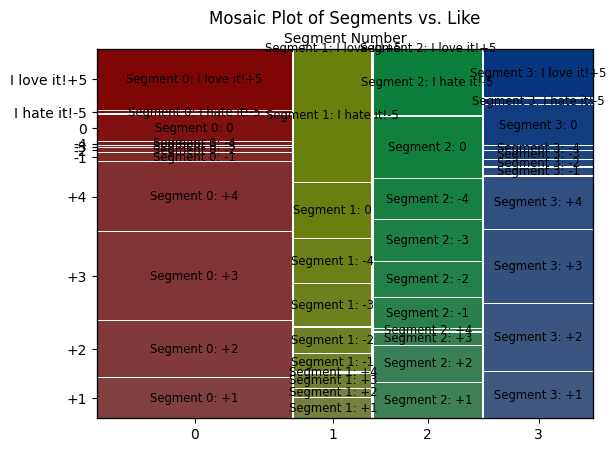

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Prepare the data
MD_x = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)

# Fit KMeans model with 4 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Assign cluster labels to the DataFrame
mcdonalds['Cluster'] = clusters

# Create a contingency table
contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like'])

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title="", labelizer=lambda k: f"Segment {k[0]}: {k[1]}")
plt.xlabel("Segment Number")
plt.ylabel("Like Value")
plt.title("Mosaic Plot of Segments vs. Like")
plt.show()


<Figure size 1000x600 with 0 Axes>

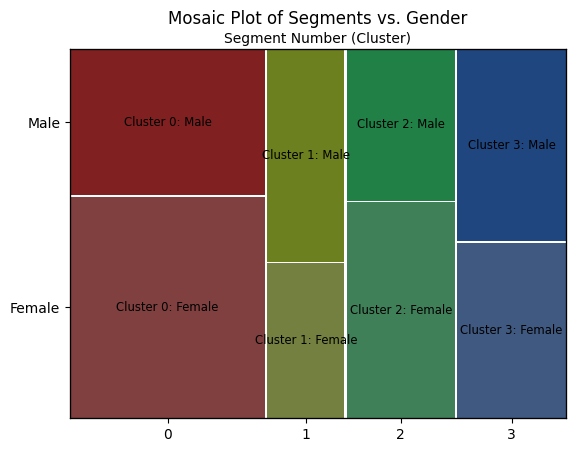

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Prepare the data
MD_x = pd.get_dummies(mcdonalds.iloc[:, :11], drop_first=True)

# Fit KMeans model with 4 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Assign cluster labels to the DataFrame
mcdonalds['Cluster'] = clusters

# Create a contingency table for clusters and gender
contingency_table_gender = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Gender'])

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table_gender.stack(), title="", labelizer=lambda k: f"Cluster {k[0]}: {k[1]}")
plt.xlabel("Segment Number (Cluster)")
plt.ylabel("Gender")
plt.title("Mosaic Plot of Segments vs. Gender")
plt.show()


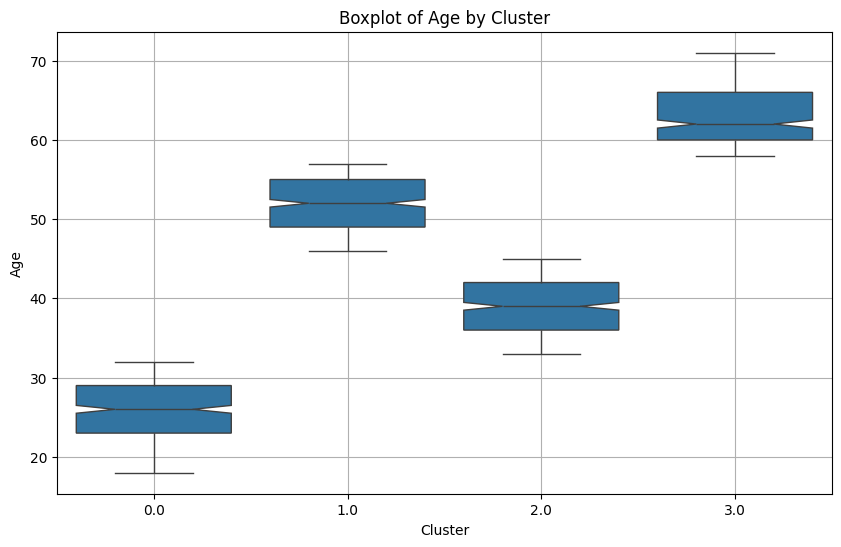

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the data and ensure 'Age' is numeric
mcdonalds['Age'] = pd.to_numeric(mcdonalds['Age'], errors='coerce')

# Fit KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(mcdonalds[['Age']].dropna())

# Assign cluster labels to the DataFrame
mcdonalds['Cluster'] = np.nan
mcdonalds.loc[mcdonalds['Age'].notna(), 'Cluster'] = clusters

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=mcdonalds, notch=True)
plt.title("Boxplot of Age by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.grid(True)
plt.show()



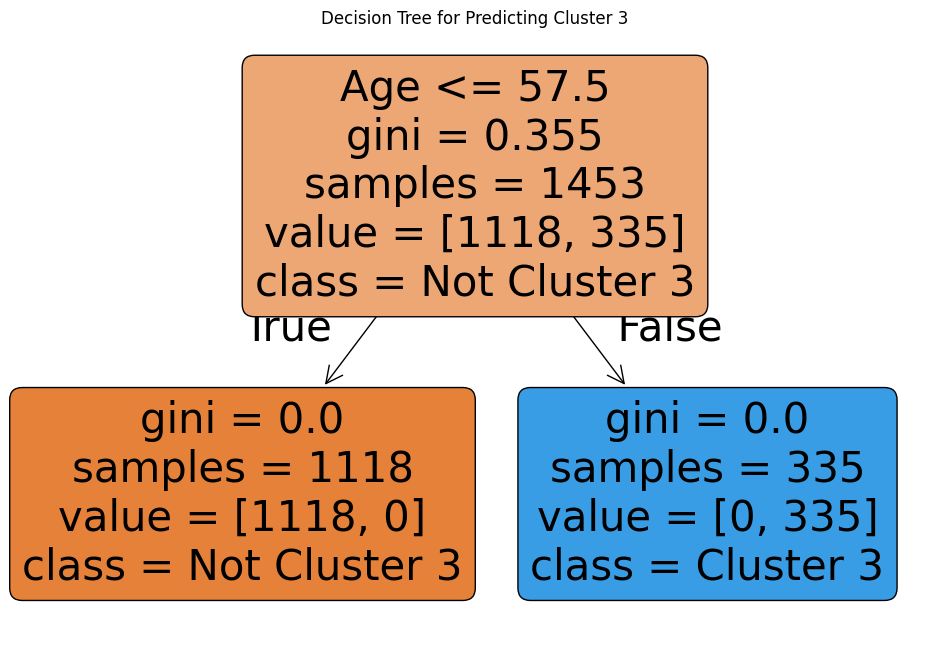

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Prepare the data
mcdonalds['Like'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')
mcdonalds['k4'] = (clusters == 3).astype(int)  # Assuming clusters has been computed

# Define features and target variable
X = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = mcdonalds['k4']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = y.astype(int)  # Ensure target is integer type

# Fit a decision tree model
tree_model = DecisionTreeClassifier(random_state=1234)
tree_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'], filled=True, rounded=True)
plt.title("Decision Tree for Predicting Cluster 3")
plt.show()


In [62]:
import pandas as pd

# Here, we just need to ensure 'VisitFrequency' is numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Group by cluster labels and calculate the mean VisitFrequency
# Make sure that 'k4' has been defined as a column in mcdonalds DataFrame
mcdonalds['k4'] = clusters  # Assuming clusters has been computed earlier

visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()

# Display the result
print(visit)


k4
0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [65]:
# Ensure that 'Like.n' is numeric
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Assuming 'k4' cluster labels have been assigned already (e.g., from KMeans)
mcdonalds['k4'] = clusters  # Assuming clusters has been computed earlier

# Group by cluster labels and calculate the mean Like.n
like = mcdonalds.groupby('k4')['Like'].mean()

# Display the result
print(like)


k4
0    4.253623
1    5.262500
2    4.868243
3    5.545113
Name: Like, dtype: float64


In [66]:
# Create a binary indicator for female
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Assuming 'k4' cluster labels have been assigned already (e.g., from KMeans)
mcdonalds['k4'] = clusters  # Assuming clusters has been computed earlier

# Group by cluster labels and calculate the mean for females
female = mcdonalds.groupby('k4')['Female'].mean()

# Display the result
print(female)


k4
0    0.524862
1    0.571429
2    0.525606
3    0.546269
Name: Female, dtype: float64


In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/mcdonalds.csv')

# Extract the relevant columns
data['Like'] = data['Like'].replace({'+1': 1, '+2': 2, '+3': 3, '+4': 4, '-1': -1, '-2': -2, '-3': -3, '-4': -4})
visit = data['VisitFrequency'].replace({
    'Once a week': 4,
    'Every three months': 3,
    'Once a month': 2
}).dropna()
like = data['Like']
like


,Like
0,-3
1,2
2,1
3,4
4,2
...,...
1448,I hate it!-5
1449,2
1450,3
1451,4
